In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [31]:
training_dataset_path = '.\gender-classification-dataset/Training'
validation_dataset_path = '.\gender-classification-dataset/Validation'
Prediction_dataset_path = '.\gender-classification-dataset/Prediction'

In [32]:
for folder in  os.listdir(training_dataset_path) : 
    files = gb.glob(pathname= str( training_dataset_path +'//'+ folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 9527 in folder female
For training data , found 11002 in folder male


In [33]:
for folder in  os.listdir(validation_dataset_path) : 
    files = gb.glob(pathname= str( validation_dataset_path +'//'+ folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 5840 in folder female
For testing data , found 5610 in folder male


In [34]:
 files = gb.glob(pathname= str( Prediction_dataset_path + '/*.jpg'))
 print(f'For Prediction data , found {len(files)}')

For Prediction data , found 48


In [35]:
code = {'male':0 ,'female':1}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [36]:
size = []
for folder in  os.listdir(training_dataset_path) : 
    files = gb.glob(pathname= str( training_dataset_path +'//'+ folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(105, 81, 3)    164
(107, 82, 3)    162
(105, 80, 3)    157
(108, 83, 3)    157
(110, 83, 3)    152
               ... 
(133, 88, 3)      1
(104, 69, 3)      1
(85, 71, 3)       1
(89, 65, 3)       1
(130, 87, 3)      1
Length: 860, dtype: int64

In [37]:
size = []
for folder in  os.listdir(validation_dataset_path) : 
    files = gb.glob(pathname= str( validation_dataset_path +'//'+ folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(108, 83, 3)    108
(107, 83, 3)    102
(110, 85, 3)     87
(103, 81, 3)     86
(108, 84, 3)     85
               ... 
(119, 97, 3)      1
(98, 71, 3)       1
(109, 92, 3)      1
(115, 73, 3)      1
(98, 68, 3)       1
Length: 776, dtype: int64

In [38]:
size = []
files = gb.glob(pathname= str(Prediction_dataset_path +'/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(111, 85, 3)    2
(104, 84, 3)    2
(104, 80, 3)    2
(98, 82, 3)     2
(107, 84, 3)    2
(106, 80, 3)    1
(97, 76, 3)     1
(100, 79, 3)    1
(109, 86, 3)    1
(107, 80, 3)    1
(100, 76, 3)    1
(105, 76, 3)    1
(108, 84, 3)    1
(107, 85, 3)    1
(99, 81, 3)     1
(105, 80, 3)    1
(102, 80, 3)    1
(99, 73, 3)     1
(98, 73, 3)     1
(107, 87, 3)    1
(101, 84, 3)    1
(97, 73, 3)     1
(110, 81, 3)    1
(106, 88, 3)    1
(111, 86, 3)    1
(115, 87, 3)    1
(107, 79, 3)    1
(113, 81, 3)    1
(114, 82, 3)    1
(113, 90, 3)    1
(101, 81, 3)    1
(110, 85, 3)    1
(116, 90, 3)    1
(110, 89, 3)    1
(112, 85, 3)    1
(97, 77, 3)     1
(113, 88, 3)    1
(111, 84, 3)    1
(113, 91, 3)    1
(103, 78, 3)    1
(114, 87, 3)    1
(113, 84, 3)    1
(109, 82, 3)    1
dtype: int64

In [39]:
#resize images 
size = 100

In [40]:
X_train = []
y_train = []
for folder in  os.listdir(training_dataset_path) : 
    files = gb.glob(pathname= str( training_dataset_path +'//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        X_train.append(list(image_array))
        y_train.append(code[folder])

In [41]:
print(f'we have {len(X_train)} items in X_train')

we have 20529 items in X_train


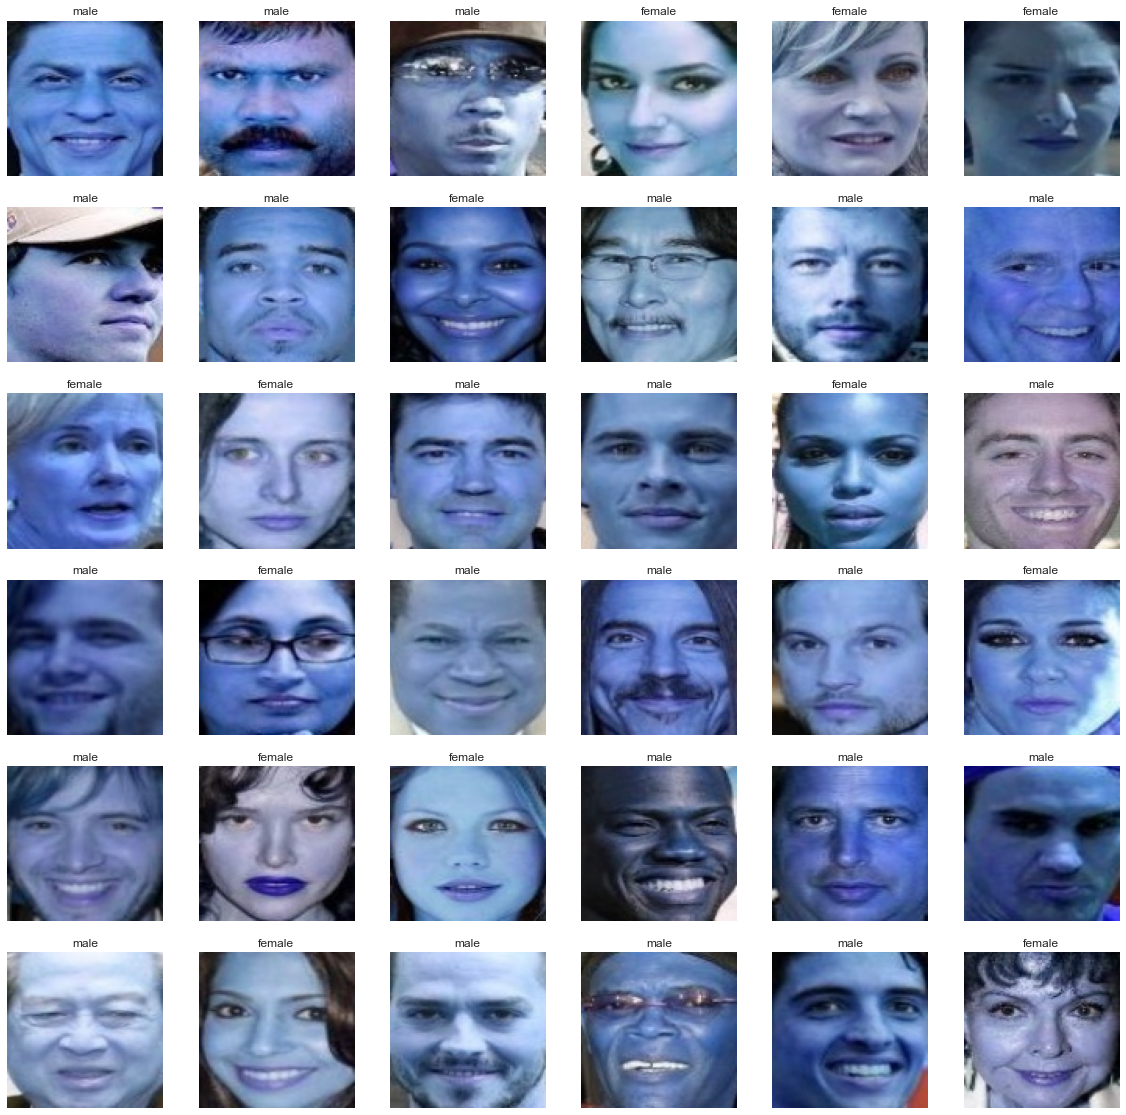

In [42]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [43]:
X_test = []
y_test = []
for folder in  os.listdir(validation_dataset_path) : 
    files = gb.glob(pathname= str(validation_dataset_path + '//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (size,size))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

In [44]:
print(f'we have {len(X_test)} items in X_test')

we have 11450 items in X_test


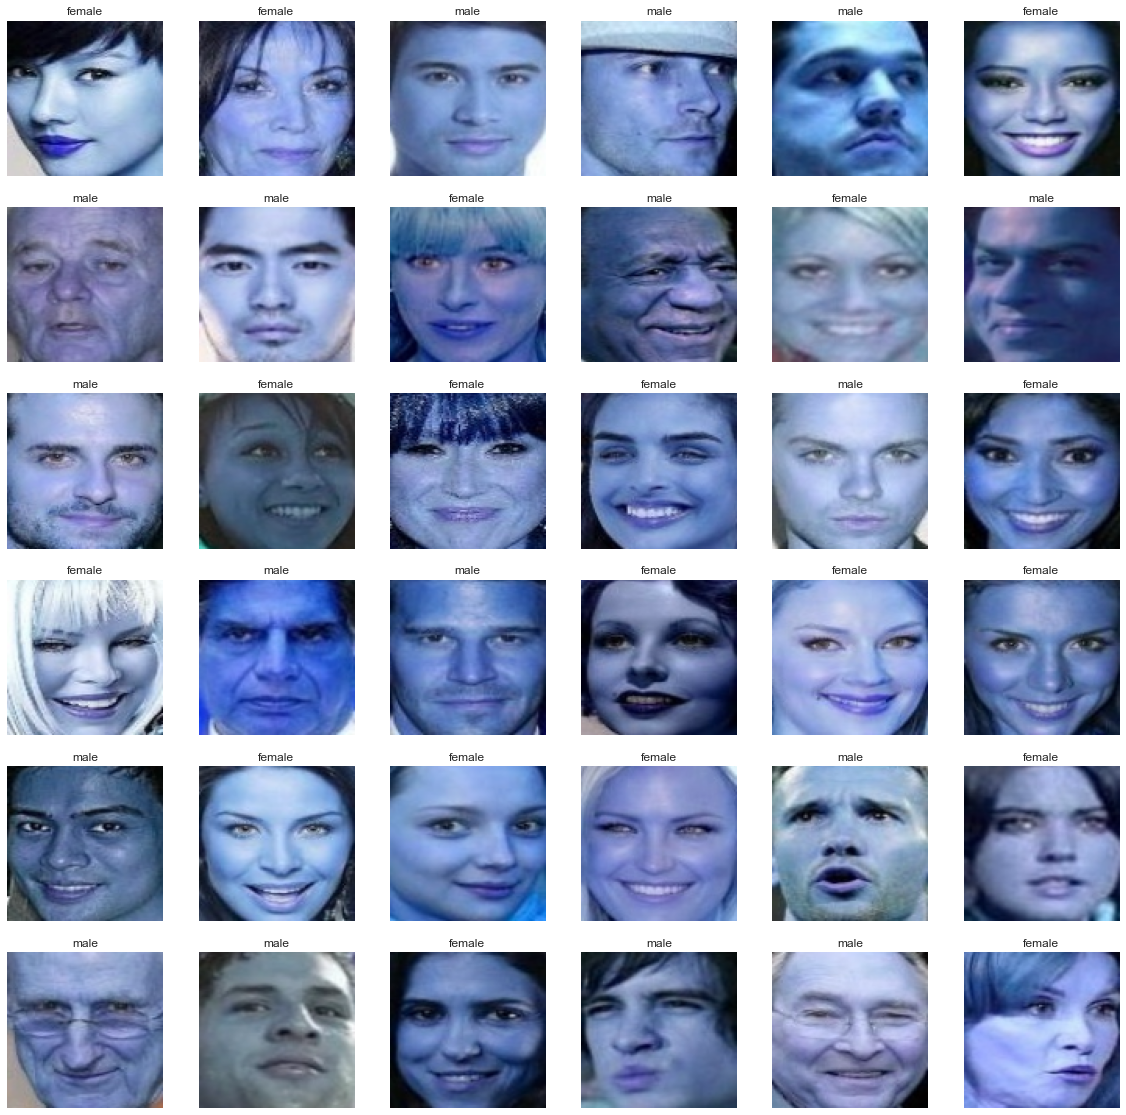

In [45]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [46]:
X_pred = []
files = gb.glob(pathname= str(Prediction_dataset_path + '/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (size,size))
    X_pred.append(list(image_array)) 

In [47]:
print(f'we have {len(X_pred)} items in X_pred')

we have 48 items in X_pred


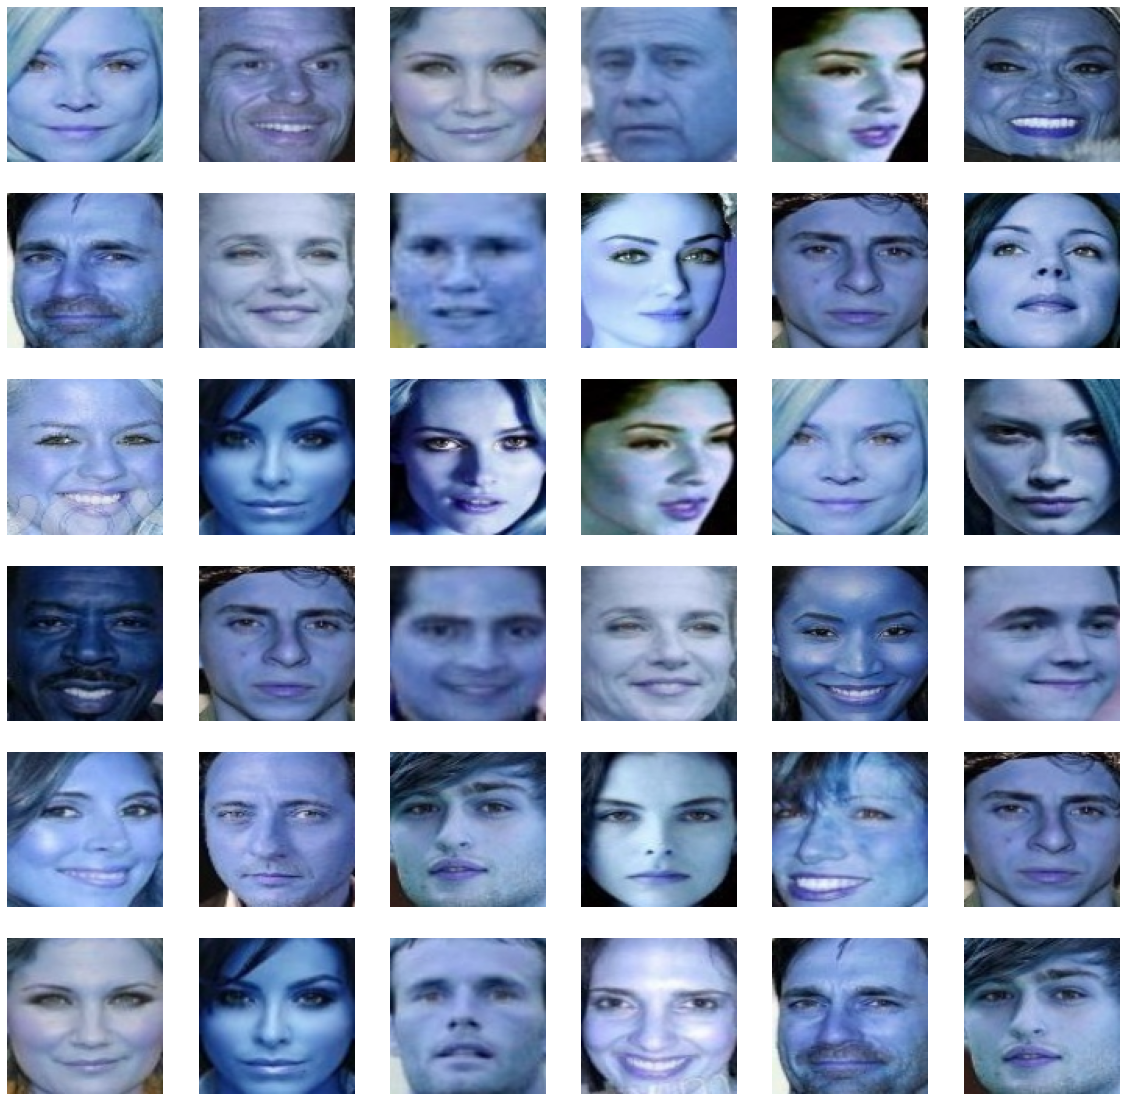

In [48]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

# BUILDING THE CNN MODEL

In [49]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_pred_array = np.array(X_pred)


print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')

X_train shape  is (20529, 100, 100, 3)
X_test shape  is (11450, 100, 100, 3)
y_train shape  is (20529,)
y_test shape  is (11450,)
X_pred shape  is (48, 100, 100, 3)


In [57]:
Model = keras.models.Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [58]:
Model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
print('Model Details are : ')
print(Model.summary())

Model Details are : 
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (Non

In [ ]:
ThisModel = Model.fit(X_train, y_train, epochs=5,batch_size=64)

Epoch 1/5
280/321 [=========================>....] - ETA: 55s - loss: 0.0962 - accuracy: 0.9653

In [63]:
ModelLoss, ModelAccuracy = modell.evaluate(X_test, y_test, batch_size=1)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

11450/11450 [==============================] - 50s 4ms/step - loss: 0.1755 - accuracy: 0.9479
Test Loss is 0.17549589276313782
Test Accuracy is 0.9478602409362793


In [51]:
Model.save('my_model2.h5')

In [62]:
modell = keras.models.load_model("my_model2.h5")

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))